In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy
import control

## Modeling

In [19]:
s = control.TransferFunction.s #symbolic variable

#system to control
plant = 1/(s*(s+1)*(s+5))

Kp = 30
Ti = 10000000000
Td = 0
pid = Kp*(1 + 1/Ti*s + Td*s)

#closed loop system
feedback = control.feedback(plant*pid)
print(feedback)


     3e-09 s + 30
----------------------
s^3 + 6 s^2 + 5 s + 30



## Calculate parameters

In [21]:
# Routh's stability criterion from https://github.com/alchemyst/Dynamics-and-Control/blob/master/tbcontrol/symbolic.py
def routh(p):
    """ Construct the Routh-Hurwitz array given a polynomial in s

    Input: p - a sympy.Poly object
    Output: The Routh-Hurwitz array as a sympy.Matrix object
    """
    coefficients = p.all_coeffs()
    N = len(coefficients)
    M = sympy.zeros(N, (N+1)//2 + 1)

    r1 = coefficients[0::2]
    r2 = coefficients[1::2]
    M[0, :len(r1)] = [r1]
    M[1, :len(r2)] = [r2]
    for i in range(2, N):
        for j in range(N//2):
            S = M[[i-2, i-1], [0, j+1]]
            M[i, j] = sympy.simplify(-S.det()/M[i-1,0])
    return M[:, :-1]

In [23]:
#applying criterion
Kp = sympy.Symbol('Kp')
s = sympy.Symbol('s')

ce = s**3 + 6*s**2 + 5*s + Kp #charateristic equation

A = routh(sympy.Poly(ce,s))
A

⎡  1     5 ⎤
⎢          ⎥
⎢  6     Kp⎥
⎢          ⎥
⎢    Kp    ⎥
⎢5 - ──  0 ⎥
⎢    6     ⎥
⎢          ⎥
⎣  Kp    0 ⎦

In [24]:
# stability limits
sympy.solve([e > 0 for e in A[:,0]], Kp)

In [25]:
# getting roots
s = sympy.Symbol('s')
jw = sympy.Symbol('jw')
ce = s**3 + 6*s**2 + 5*s + 30

roots = sympy.solve(ce,s)
roots

In [28]:
# calculate Kp Ti Td
w = np.sqrt(5)
Pcr = (2*np.pi)/w

Kcr = 30
Kp = 0.6*Kcr
Ti = 0.5*Pcr
Td = 0.125*Pcr

print("Kp:", Kp)
print("Ti:", Ti)
print("Td:", Td)

Kp: 18.0
Ti: 1.4049629462081452
Td: 0.3512407365520363


## Creating the controller


           8.877 s^2 + 25.29 s + 18
----------------------------------------------
1.405 s^4 + 8.43 s^3 + 15.9 s^2 + 25.29 s + 18



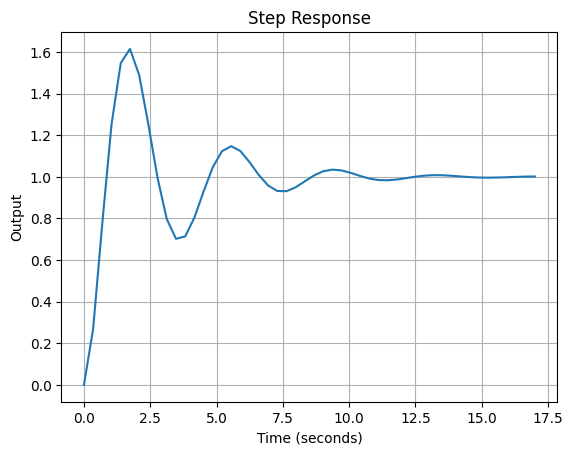

In [29]:
s = control.TransferFunction.s

plant = (1/(s*(s+1)*(s+5)))

Kp = 18
Ti = 1.405
Td = 0.351
pid = (Kp*(1 + 1/(Ti*s) + Td*s))

feedback = control.feedback(plant*pid)

t = np.linspace(0,17)
T, y = control.step_response(feedback, t)

print(feedback)

# plot
plt.plot(T, y)
plt.xlabel('Time (seconds)')
plt.ylabel('Output')
plt.title('Step Response')
plt.grid()
plt.show()

In [30]:
# Get more info
info = control.step_info(feedback)
print("feedback info")
print("-------------")
print("RiseTime:",info["RiseTime"])
print("Overshoot:", info["Overshoot"])
